In [1]:
from glob import glob
import pandas as pd

# import slide_alignment

# from slide_alignment import pipeline
# from slide_alignment.utils import create_img_from_qptiff
# from slide_alignment.alignment_imports import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
import torch
# import cv2
# import pyvips
import parse

from prodigy.components.db import connect

# from skimage.transform import rescale, resize, downscale_local_mean



In [2]:
# def prepare_tiling_scripts(mask_dir, out_dir, tiling_script, file_list, script_fname='run_tiling.sh'):
#     """
#     Expects entries in file_list to follow `file_label.svs` that is consistent with histoqc outputs
#     such that the mask_dir looks like:
    
#     mask_dir
#         file_label.svs
#             file_label.svs_mask_use.png
#             ...
#             file_label.svs_xxxxxxxx.png
#     """
#     #Open a .sh file and place the appropriate tiling commands in it
#     with open(script_fname,'w') as f:
#         #Provide a list of all WSIs to be tiled - this should be a path to some folder on your persistent disk that holds the raw .svs WSI files.
#         #Note the use of the "*" regex, which retrieves all files in a given path with the appropriate extension. 
#         print('Preparing to write commands for ' + str(len(file_list)) + ' files...\n')
#         for slide_path in file_list:
#             #Extract the slide ID from the path name
#             temp_id = slide_path.split('/')[-1]
#             #The path to the mask generated by HistoQC has additional layers of directories, which is filled in by the temp_id variable.
#             #You just ned to change the first part of the mask_path to the single folder that holds all of the HistoQC outputs, and the script handles the rest.
#             mask_path = os.path.join(mask_dir, temp_id, temp_id)
#             #This is the string that gets written to the shell script. Change the path to the appropriate location of your tiling script.
#             #This is where additional flags can be added to further customize your tiling routine. 
#             #Check the parser section of the tiling script to find the relevant flags and parameters. 
#             cmd = f"python {tiling_script} {slide_path} --o {out_dir} -f 'png' -M 20 -m {mask_path} -j 16"
#             f.write(cmd)
#             f.write('\n')
#             print(f'Command for {temp_id} done!')
#         f.close()
#         print('Shell script done!')

def prepare_tiling_scripts(mask_dir, out_dir, tiling_script, file_list, script_fname='run_tiling.sh'):
    """
    Expects entries in file_list to follow `file_label.svs` that is consistent with histoqc outputs
    such that the mask_dir looks like:
    
    mask_dir
        file_label.svs
            file_label.svs_mask_use.png
            ...
            file_label.svs_xxxxxxxx.png
    """
    #Open a .sh file and place the appropriate tiling commands in it
    with open(script_fname,'w') as f:
        #Provide a list of all WSIs to be tiled - this should be a path to some folder on your persistent disk that holds the raw .svs WSI files.
        #Note the use of the "*" regex, which retrieves all files in a given path with the appropriate extension. 
        print('Preparing to write commands for ' + str(len(file_list)) + ' files...\n')
        for slide_path in file_list:
            #Extract the slide ID from the path name
            temp_id = slide_path.split('/')[-1]
            #The path to the mask generated by HistoQC has additional layers of directories, which is filled in by the temp_id variable.
            #You just ned to change the first part of the mask_path to the single folder that holds all of the HistoQC outputs, and the script handles the rest.
            mask_path = os.path.join(mask_dir, temp_id, temp_id)
            #This is the string that gets written to the shell script. Change the path to the appropriate location of your tiling script.
            #This is where additional flags can be added to further customize your tiling routine. 
            #Check the parser section of the tiling script to find the relevant flags and parameters. 
            cmd = f"python {tiling_script} '{slide_path}' --o {out_dir} -f 'png' -M 20 -m '{mask_path}' -j 16"
            f.write(cmd)
            f.write('\n')
            print(f'Command for {temp_id} done!')
        f.close()
        print('Shell script done!')

In [3]:
import os

mask_dir = '/home/jupyter/histoqc_outputs_ccrcc_51_immunoprofile/'
out_dir = '/mnt/disks/image_data/immunoprofile/ccrcc_subset_processing/tiles'
tiling_script = '/home/jupyter/tiling_rose_histoqc_v3.py'
script_fname = '/home/jupyter/20220714_run_tiling_ccrcc_51_immunoprofile.sh'

try:
    os.mkdir(out_dir)
except:
    pass

In [4]:
df = pd.read_csv('/mnt/disks/image_data/immunoprofile/ccrcc_subset_processing/basic_info_ccrcc_cases_with_hne_paths.csv')

In [5]:
file_list = df['hne_path'].values

In [6]:
# from glob import glob

# files = glob('/mnt/disks/image_data/denize_multislide_raw/denize_slides/*qptiff')
# file_list = [x for x in files if 'excluded' not in x.lower()]

In [7]:
prepare_tiling_scripts(mask_dir, out_dir, tiling_script, file_list, script_fname)

Preparing to write commands for 51 files...

Command for IP_19_A00298_HnE_Scan1.qptiff done!
Command for IP_19_A01061_HnE_Scan1.qptiff done!
Command for IP_19_E00657_HnE_Scan2.qptiff done!
Command for IP_19_F00114_HnE_Scan1.qptiff done!
Command for IP_19_F00568_HnE_Scan2.qptiff done!
Command for IP_19_G00268_HnE_Scan1.qptiff done!
Command for IP_19_G00562_HnE_Scan1.qptiff done!
Command for IP_19_G00660_HnE_Scan1.qptiff done!
Command for IP_19_J00132_HnE_Scan1.qptiff done!
Command for IP_19_J00765_HnE_Scan1.qptiff done!
Command for IP_19_K00190_HnE_Scan1.qptiff done!
Command for IP_19_M00766_HnE_Scan2.qptiff done!
Command for IP_19_R00279_HnE_Scan1.qptiff done!
Command for IP_19_R00556_HnE_Scan2.qptiff done!
Command for IP_19_T00094_HnE_Scan1.qptiff done!
Command for IP_19_T00810_HnE_Scan1.qptiff done!
Command for IP_19_W00557_HnE_Scan1.qptiff done!
Command for IP_20_A00248_HnE_Scan1.qptiff done!
Command for IP_20_F00356_HnE_Scan1.qptiff done!
Command for IP_20_J00195_HnE_Scan2.qptiff d

### Inspect single run to confirm working

In [8]:
#This is one of the most useful helper functions for grouping tiles for visualizing, assigning labels or creating data splits.
def create_paths_simplified(dir_path, extension='*.png'):
    """
    Creates a pandas dataframe based on produced crops tensor crops saved as torch pickle files
    example expected glob entry: "dir_path/crop_0_TCGA-B0-5083_class0.pth"
    """
    paths = glob(os.path.join(dir_path, extension))
    print(os.path.join(dir_path, extension))
    ids = [x.split('/')[-3].split('_files')[0] for x in paths]
    store = pd.DataFrame()
    store['slide_id'] = ids
    store['full_path'] = paths
    store['x'] = store.full_path.apply(lambda x: float(x.split('/')[-1].split('_')[-2])).astype(int)
    store['y'] = store.full_path.apply(lambda x: float(x.split('/')[-1].split('_')[-1].split('.')[0])).astype(int)
    return store

In [43]:
import pandas as pd

In [13]:
df = create_paths_simplified("/mnt/disks/image_data/immunoprofile/ccrcc_subset_processing/tiles/*/*/")

/mnt/disks/image_data/immunoprofile/ccrcc_subset_processing/tiles/*/*/*.png


In [15]:
df = df.set_index('slide_id')

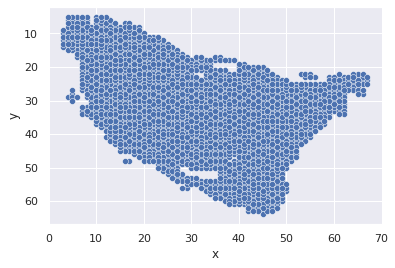

In [16]:
import seaborn as sns

sns.set()
g = sns.scatterplot(x='x',y='y',data=df.loc['IP_20_A00248_HnE_Scan1'])
g.invert_yaxis()

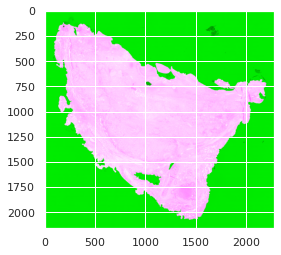

In [18]:
plt.imshow(plt.imread('/home/jupyter/histoqc_outputs_ccrcc_51_immunoprofile/IP_20_A00248_HnE_Scan1.qptiff/IP_20_A00248_HnE_Scan1.qptiff_fuse.png'))

In [28]:
df = df.reset_index()

In [29]:
df['case_id'] = df['slide_id'].apply(lambda x: x.split('_HnE')[0])

In [31]:
df.set_index('case_id')

,slide_id,full_path,x,y
case_id,,,,
IP_20_A00248,IP_20_A00248_HnE_Scan1,/mnt/disks/image_data/immunoprofile/ccrcc_subs...,37,32
IP_20_A00248,IP_20_A00248_HnE_Scan1,/mnt/disks/image_data/immunoprofile/ccrcc_subs...,46,46
IP_20_A00248,IP_20_A00248_HnE_Scan1,/mnt/disks/image_data/immunoprofile/ccrcc_subs...,13,16
IP_20_A00248,IP_20_A00248_HnE_Scan1,/mnt/disks/image_data/immunoprofile/ccrcc_subs...,61,25
IP_20_A00248,IP_20_A00248_HnE_Scan1,/mnt/disks/image_data/immunoprofile/ccrcc_subs...,29,29
...,...,...,...,...
IP_19_W00071,IP_19_W00071_HnE_Scan1,/mnt/disks/image_data/immunoprofile/ccrcc_subs...,46,50
IP_19_W00071,IP_19_W00071_HnE_Scan1,/mnt/disks/image_data/immunoprofile/ccrcc_subs...,39,70
IP_19_W00071,IP_19_W00071_HnE_Scan1,/mnt/disks/image_data/immunoprofile/ccrcc_subs...,32,63


In [34]:
df['case_id'].unique().shape

(51,)

In [35]:
df.set_index('case_id').to_csv('./ccrcc_51_immunoprofile_hne_tile_paths.csv')
df.set_index('case_id').to_csv('/mnt/disks/image_data/immunoprofile/ccrcc_subset_processing/ccrcc_51_immunoprofile_hne_tile_paths.csv')

In [36]:
cp ~/20220714* /mnt/disks/image_data/immunoprofile/ccrcc_subset_processing/

In [37]:
ls -lah /mnt/disks/image_data/immunoprofile/ccrcc_subset_processing/

total 21M
drwxr-xr-x   3 jupyter jupyter 4.0K Jul 14 16:58 ./
drwxrwxrwx 416 root    root     20K Jul 14 14:43 ../
-rw-r--r--   1 jupyter jupyter  19K Jul 14 16:58 20220714.ipynb
-rw-r--r--   1 jupyter jupyter  204 Jul 14 16:58 20220714_edit_qptiff_header.sh
-rw-r--r--   1 jupyter jupyter 8.4K Jul 14 16:58 20220714_header_cmds.txt
-rw-r--r--   1 jupyter jupyter  252 Jul 14 16:58 20220714_run_histoqc_ccrcc_immunoprofile.sh
-rw-r--r--   1 jupyter jupyter  17K Jul 14 16:58 20220714_run_tiling_ccrcc_51_immunoprofile.sh
-rw-r--r--   1 jupyter jupyter 247K Jul 14 14:44 20220714_scratch_revisiting_ip_ccrcc_resections.ipynb
-rw-r--r--   1 jupyter jupyter 113K Jul 14 16:58 20220714_write_histoqc_cmds.ipynb
-rw-r--r--   1 jupyter jupyter  34K Jul 14 14:44 basic_info_ccrcc_cases_with_hne_paths.csv
-rw-r--r--   1 jupyter jupyter  21M Jul 14 16:56 ccrcc_51_immunoprofile_hne_tile_paths.csv
drwxr-xr-x  53 jupyter jupyter 4.0K Jul 14 16:47 tiles/
